# Obtaining the Data

In [1]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Order.tsv file and storing it into the dataframe called as "df1"

df1 = pd.read_csv('Order.tsv', sep='\t')
print(df1.shape)
df1.head()

(4117, 11)


,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5
4,AZ-2011-617423,1-5-13,Daniel Burke,Echirolles,France,Central,Home Office,1-7-13,Priority,Auvergne-Rhône-Alpes,2


In [3]:
# Reading the Order_breakdown.json file and storing it into the dataframe called as "df2"

df2 = pd.read_json('Order_breakdown.json')
print(df2.shape)
df2.head()


(8047, 9)


,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [4]:
# Merging both the dataframes into one based on the mutual column "Order ID"

df = pd.merge(df1, df2, on="Order ID", how="outer")
print(df.shape)
df.head()

(8047, 19)


,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


# Scrubbing the Data

In [5]:
# Check to see if there are any missing values in our data set

df.isnull().sum()

Order ID           0
Order Date         0
Customer Name      0
City               0
Country            0
Region             0
Segment            0
Ship Date          0
Ship Mode          0
State              0
Days to Ship       0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
dtype: int64

In [6]:
# Check the Type of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         8047 non-null   object 
 1   Order Date       8047 non-null   object 
 2   Customer Name    8047 non-null   object 
 3   City             8047 non-null   object 
 4   Country          8047 non-null   object 
 5   Region           8047 non-null   object 
 6   Segment          8047 non-null   object 
 7   Ship Date        8047 non-null   object 
 8   Ship Mode        8047 non-null   object 
 9   State            8047 non-null   object 
 10  Days to Ship     8047 non-null   int64  
 11  Product Name     8047 non-null   object 
 12  Discount         8047 non-null   float64
 13  Actual Discount  8047 non-null   float64
 14  Sales            8047 non-null   int64  
 15  Profit           8047 non-null   int64  
 16  Quantity         8047 non-null   int64  
 17  Category      

In [7]:
# Converting the columns Order Date and Ship Date into Datetime Format

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         8047 non-null   object        
 1   Order Date       8047 non-null   datetime64[ns]
 2   Customer Name    8047 non-null   object        
 3   City             8047 non-null   object        
 4   Country          8047 non-null   object        
 5   Region           8047 non-null   object        
 6   Segment          8047 non-null   object        
 7   Ship Date        8047 non-null   datetime64[ns]
 8   Ship Mode        8047 non-null   object        
 9   State            8047 non-null   object        
 10  Days to Ship     8047 non-null   int64         
 11  Product Name     8047 non-null   object        
 12  Discount         8047 non-null   float64       
 13  Actual Discount  8047 non-null   float64       
 14  Sales            8047 non-null   int64  

In [8]:
# Dropping the Order ID and Customer Name column
df.drop('Order ID', axis=1, inplace=True)
df.drop('Customer Name', axis=1, inplace=True)

# Extracting Year from Order Date and Ship Date

order_year = df['Order Date'].dt.year
df.drop('Order Date', axis=1, inplace=True)
df.insert(0, 'Order Year', order_year)

ship_year = df['Ship Date'].dt.year
df.drop('Ship Date', axis=1, inplace=True)
df.insert(7, 'Ship Year', ship_year)

In [9]:
# Move the target variable "Sales" to the last of the table

last = df['Sales']
df.drop('Sales', axis=1, inplace = True)
df.insert(16,'Sales', last)
df.head()

,Order Year,City,Country,Region,Segment,Ship Mode,State,Ship Year,Days to Ship,Product Name,Discount,Actual Discount,Profit,Quantity,Category,Sub-Category,Sales
0,2013,Stockholm,Sweden,North,Home Office,Economy Plus,Stockholm,2013,4,"Enermax Note Cards, Premium",0.5,22.5,-26,3,Office Supplies,Paper,45
1,2013,Southport,United Kingdom,North,Consumer,Economy,England,2013,4,"Dania Corner Shelving, Traditional",0.0,0.0,290,7,Furniture,Bookcases,854
2,2013,Valence,France,Central,Consumer,Economy,Auvergne-Rhône-Alpes,2013,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,21,3,Office Supplies,Art,140
3,2013,Birmingham,United Kingdom,North,Corporate,Economy,England,2013,5,"Boston Markers, Easy-Erase",0.5,13.5,-22,2,Office Supplies,Art,27
4,2013,Birmingham,United Kingdom,North,Corporate,Economy,England,2013,5,"Eldon Folders, Single Width",0.5,8.5,-1,2,Office Supplies,Storage,17


### Checking the Correlation

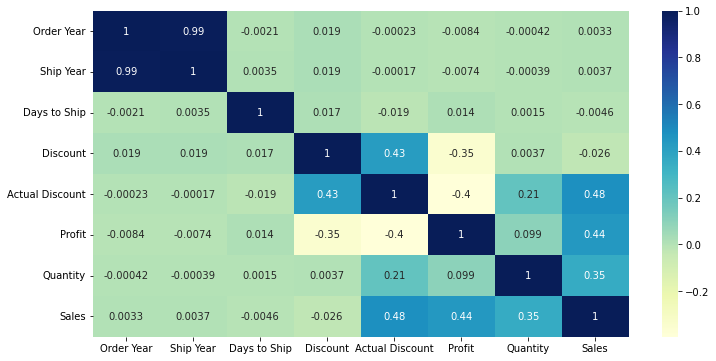

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Statistical Overview

In [11]:
df.describe(percentiles = [0.05, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,5%,50%,90%,95%,96%,97%,98%,99%,max
Order Year,8047.0,2014.731080,1.100474,2013.0,2013.0,2015.0,2016.00,2016.0,2016.00,2016.000,2016.000,2016.000,2016.00
Ship Year,8047.0,2014.744998,1.106819,2013.0,2013.0,2015.0,2016.00,2016.0,2016.00,2016.000,2016.000,2016.000,2017.00
Days to Ship,8047.0,4.007332,1.741232,0.0,0.0,4.0,6.00,7.0,7.00,7.000,7.000,7.000,7.00
Discount,8047.0,0.110047,0.181773,0.0,0.0,0.0,0.50,0.5,0.50,0.500,0.500,0.600,0.85
Actual Discount,8047.0,29.793078,88.817656,0.0,0.0,0.0,80.48,147.7,176.00,217.886,291.508,437.454,1700.00
Profit,8047.0,35.198211,178.125844,-3060.0,-93.0,14.0,135.00,241.0,288.00,352.000,448.160,701.000,2476.00
Quantity,8047.0,3.772089,2.203369,1.0,1.0,3.0,7.00,8.0,9.00,9.000,9.000,11.000,14.00
Sales,8047.0,291.845657,485.212156,3.0,17.0,117.0,742.00,1200.0,1306.32,1557.720,1860.320,2456.540,6517.00


### Inference :-
- The dataset contains 8046 and 19 columns
- Average time to ship the order is 4 days.
- Average Sales and Profit is 117 and 14 respectively.
- The maximum has been sold is 14.
- Maximum Sale is 6517 with 99% of Sales retaining at 2456.

## Handling Outliers

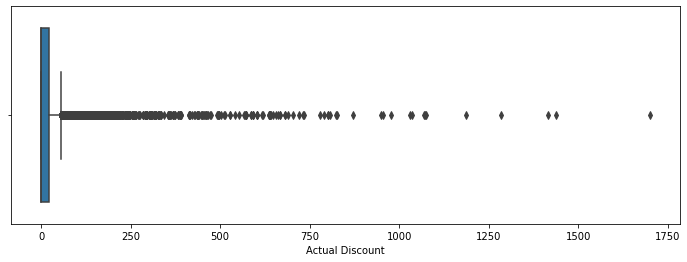

In [12]:
# Boxplot for Outliers in Actual Discount

plt.figure(figsize=(12,4))
sns.boxplot(df['Actual Discount'])
plt.show()

In [13]:
print(df[df['Actual Discount']>437].shape)

(82, 17)


In [14]:
# Outlier Clipping

# As we can see 99% of the values are less than 437 in Actual Discount.
# Replacing outliers where the Actual Discount is greater than 437.

df['Actual Discount'] = np.where(df['Actual Discount']>437, 437, df['Actual Discount'])

# Exploring the Data

### Distribution Plots (Actual Discount - Profit - Quantity - Sales)

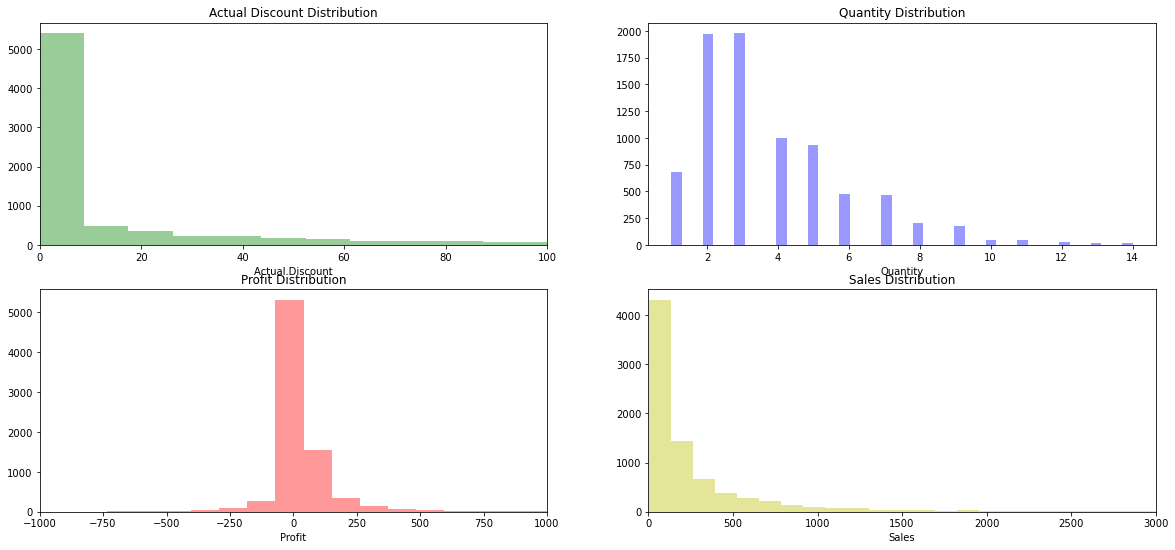

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,9))

# Graph for Actual Discount
sns.distplot(df['Actual Discount'], kde=False, color='g', ax=axes[0,0])
axes[0,0].set_title('Actual Discount Distribution')
axes[0,0].set_xlim([0,100])

# Graph for Profit
sns.distplot(df['Profit'], kde=False, color='r', ax = axes[1,0])
axes[1,0].set_title('Profit Distribution')
axes[1,0].set_xlim([-1000, 1000])

# Graph for Quantity
sns.distplot(df['Quantity'], kde=False, color='b', ax = axes[0,1])
axes[0,1].set_title('Quantity Distribution')

# Graph for Sales
sns.distplot(df['Sales'], kde=False, color='y', ax = axes[1,1])
axes[1,1].set_title('Sales Distribution')
axes[1,1].set_xlim([0,3000])

plt.show()

### Summary :-

- Actual Discount - Most of the Discount is between 0 to 20.
- Quantity - 2,3 no. of quantity has been sold the most followed by 4 and 5.
- Profit - The profit is between -250 to 250 with a huge spike at 0.
- Sales - There is a unimodal distribution of Sales with the largest spkie between 0 to 500.<br>
<br>
The Actual Discount, Profit , Sales are unimodal distribution where the Quantity is a bimodal distribution.

### Scatter Plot of Sales and Profit

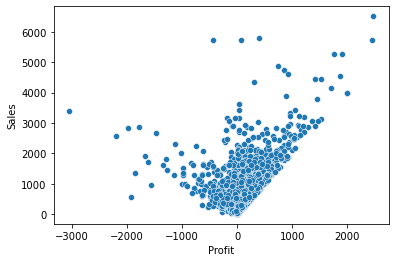

In [16]:
sns.scatterplot(y=df['Sales'], x = df['Profit'])
plt.show()

### Inference :-
This plot has a positive association shows that sales increases, so does profit.

## Countplot for Region and Segment

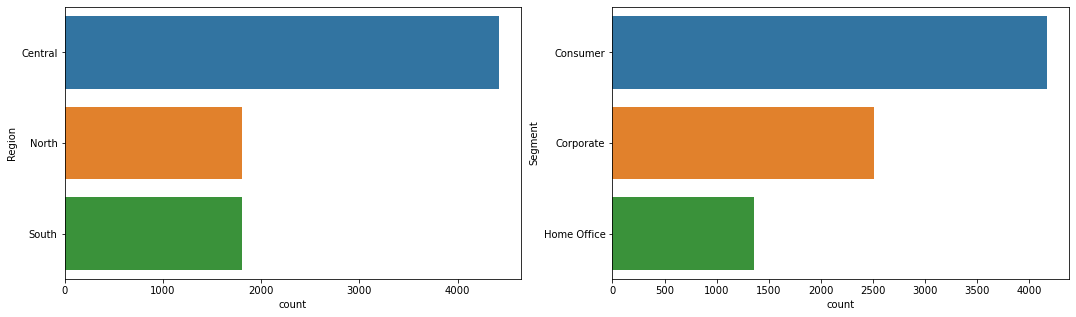

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(18,5))

# Region Countp[lot
sns.countplot(y=df['Region'], order=df['Region'].value_counts().sort_values(ascending=False).index, ax=axes[0])

# Segment Countplot
sns.countplot(y=df['Segment'], order=df['Segment'].value_counts().sort_values(ascending=False).index, ax=axes[1])

plt.show()

### Inference :-
- Central region have the highest orders, North and South Region have equal orders.
- Mostly orders are placed by the consumers followed by the Corporate.

## Countplot for Ship Mode and Days to Ship

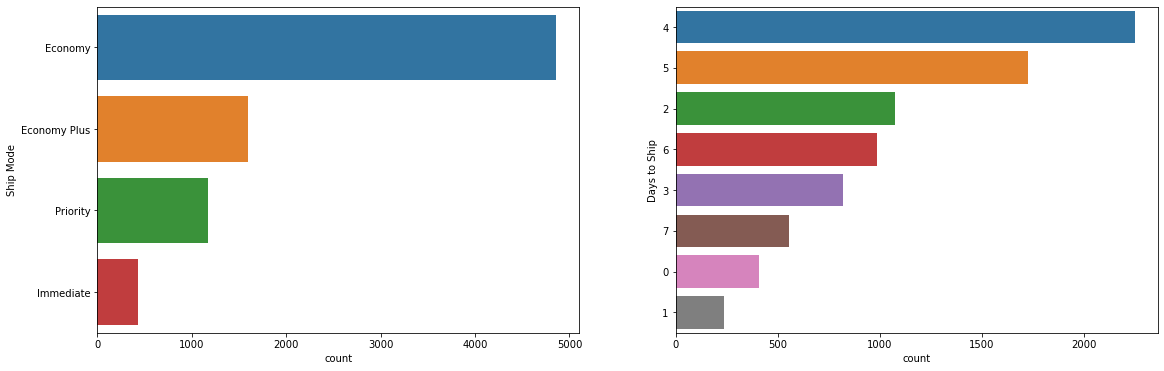

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(19,6))

# Ship Mode Countplot
sns.countplot(y=df['Ship Mode'], order=df['Ship Mode'].value_counts().sort_values(ascending=False).index, ax=axes[0])

# Days to Ship Countplot
sns.countplot(y=df['Days to Ship'], order=df['Days to Ship'].value_counts().sort_values(ascending=False).index, ax=axes[1])

plt.show()

### Inference :- 
- Economy earned the hidhest orders followed by Econmy Plus.
- Immediate ship mode have gain the lowest orders.
- Mostly orders shipped in 4 or 5 days.
- Around 700 hundered of orders are shipped on the same day or the next day.

## Sales vs Country

In [19]:
df_country = df.groupby('Country')[['Sales']].sum().sort_values( by = 'Sales',ascending=True).reset_index()
print(type(df_country))
df_country

<class 'pandas.core.frame.DataFrame'>


,Country,Sales
0,Denmark,7763
1,Portugal,15106
2,Ireland,15998
3,Norway,20529
4,Finland,20702
5,Switzerland,24874
6,Sweden,30490
7,Belgium,42320
8,Netherlands,70313
9,Austria,79382


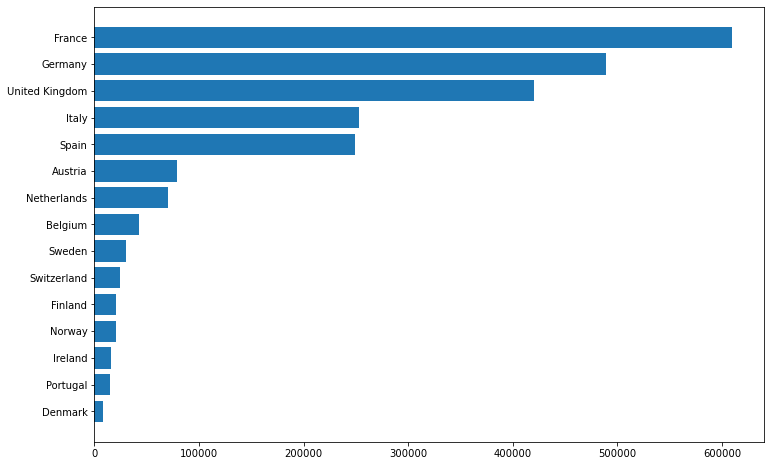

In [20]:
plt.figure(figsize=(12,8))
plt.barh(df_country['Country'], df_country['Sales'])
plt.show()

### Inference :-
- France recorded the highest sale followed by Germany and United Kingdom.
- Denmark, Portugal, Ireland have very fewer sales.

## Sales vs Category

In [21]:
df_category = df.groupby('Category')[['Sales']].sum().sort_values( by = 'Sales',ascending=True).reset_index()
print(type(df_category))
df_category

<class 'pandas.core.frame.DataFrame'>


,Category,Sales
0,Furniture,638809
1,Office Supplies,823658
2,Technology,886015


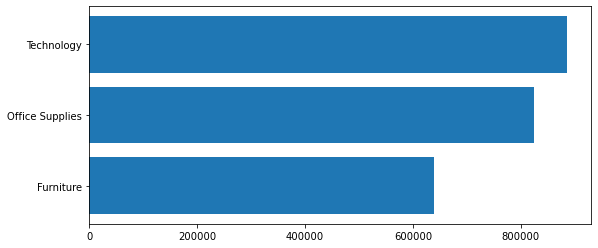

In [22]:
plt.figure(figsize=(9,4))
plt.barh(df_category['Category'], df_category['Sales'])
plt.show()

### Inference :-
Technology recorded highest sales despite having the highest orders for the office supplies.

# Modeling the Data

### Selecting the Dependent and the Independent Features

In [23]:
x = df.drop('Sales', axis=1)
y = df['Sales']

print(type(x))
print(type(y))

print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(8047, 16)
(8047,)


### Splitting the data into train and test data

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(6035, 16)
(2012, 16)
(6035,)
(2012,)


### Creating function to evaluate the Regression Evaluation Metrics

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Function for Regression Evaluation Metrics

d = {'Model' : [], 'MAE' : [], 'MSE' : [], 'R2Score' : []}
def eval_model(model_name, y, ypred) :
  mae = mean_absolute_error(y, ypred)
  mse = mean_squared_error(y, ypred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, ypred)
  print('MAE', mae)
  print('MSE', mse)
  print('RMSE', rmse)
  print('R2 Score', r2)
  d['Model'].append(model_name)
  d['MAE'].append(mae)
  d['MSE'].append(mse)
  d['R2Score'].append(r2)

### Import ML Libraries

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Import the neccessary sklearn transformational libraries

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
# Let's get a quick look on the dataset
x.head(2)

,Order Year,City,Country,Region,Segment,Ship Mode,State,Ship Year,Days to Ship,Product Name,Discount,Actual Discount,Profit,Quantity,Category,Sub-Category
0,2013,Stockholm,Sweden,North,Home Office,Economy Plus,Stockholm,2013,4,"Enermax Note Cards, Premium",0.5,22.5,-26,3,Office Supplies,Paper
1,2013,Southport,United Kingdom,North,Consumer,Economy,England,2013,4,"Dania Corner Shelving, Traditional",0.0,0.0,290,7,Furniture,Bookcases


## 1) Linear Regression

In [30]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [1,2,3,4,5,6,9,14,15]),
                          ('num_col', StandardScaler(), [0,7,8,10,11,12,13])])
step2 = LinearRegression()
pipe_lr = Pipeline([('step1', step1), ('step2', step2)])
pipe_lr.fit(x_train, y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model('Linear Regression', y_test, ypred_lr)

MAE 2231411349203.9927
MSE 3.741222170006709e+26
RMSE 19342239193037.37
R2 Score -1.7141648317119364e+21


## 2) Ridge

In [31]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [1,2,3,4,5,6,9,14,15]),
                         ('num_col', StandardScaler(), [0,7,8,10,11,12,13])])
step2 = Ridge(alpha=10)
pipe_ridge = Pipeline([('step1', step1), ('step2', step2)])
pipe_ridge.fit(x_train, y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model('Ridge Regression', y_test, ypred_ridge)

MAE 125.66093942028253
MSE 94276.14157522673
RMSE 307.04420133789654
R2 Score 0.5680426368331409


## 3) Lasso

In [32]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [1,2,3,4,5,6,9,14,15]),
                         ('num_col', StandardScaler(), [0,7,8,10,11,12,13])])
step2 = Lasso(alpha=0.1)
pipe_lasso = Pipeline([('step1', step1), ('step2', step2)])
pipe_lasso.fit(x_train, y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model('Lasso Regression', y_test, ypred_lasso)

MAE 121.96935773378245
MSE 99495.92822567889
RMSE 315.4297516495216
R2 Score 0.5441264557066177


## 4) KNeighbors Regressor

In [33]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [1,2,3,4,5,6,9,14,15]),
                         ('num_col', StandardScaler(), [0,7,8,10,11,12,13])])

# Finding the best value of K with the lowest MSE
k_values = [1, 3, 5, 7, 9]
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    pipe_knn = Pipeline([('step1', step1), ('step2', knn)])
    pipe_knn.fit(x_train, y_train)
    y_pred = pipe_knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_k = k_values[np.argmin(mse_values)]
print("The best value of k is:", best_k)
print('------------------')

# Training the model and generating Predictions
step2 = KNeighborsRegressor(n_neighbors=best_k)
pipe_knn = Pipeline([('step1', step1), ('step2', step2)])
pipe_knn.fit(x_train, y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model('KNeighbors Regressor', y_test, ypred_knn)

The best value of k is: 9
------------------
MAE 118.8078197481776
MSE 70203.97922342489
RMSE 264.9603351889201
R2 Score 0.6783372203987164


## 5) Decision Tree Regressor

In [34]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [1,2,3,4,5,6,9,14,15]),
                         ('num_col', StandardScaler(), [0,7,8,10,11,12,13])])

step2 = DecisionTreeRegressor(max_depth=16, min_samples_split=15)
pipe_dt = Pipeline([('step1', step1), ('step2', step2)])
pipe_dt.fit(x_train, y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model('Decision Tree Regressor', y_test, ypred_dt)

MAE 87.55555697497499
MSE 65379.331340375575
RMSE 255.69382343024162
R2 Score 0.7004429424080076


## 6) Random Forest Regressor

In [35]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [1,2,3,4,5,6,9,14,15]),
                         ('num_col', StandardScaler(), [0,7,8,10,11,12,13])])

step2 = RandomForestRegressor(n_estimators=100,max_depth=16, min_samples_split=18, random_state=5)
pipe_rf = Pipeline([('step1', step1), ('step2', step2)])
pipe_rf.fit(x_train, y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model('Random Forest Regressor', y_test, ypred_rf)

MAE 74.57971107490766
MSE 51564.61592677064
RMSE 227.07843562692307
R2 Score 0.7637396359643487


In [36]:
# Printing metrics of all the Models

d

{'Model': ['Linear Regression',
  'Ridge Regression',
  'Lasso Regression',
  'KNeighbors Regressor',
  'Decision Tree Regressor',
  'Random Forest Regressor'],
 'MAE': [2231411349203.9927,
  125.66093942028253,
  121.96935773378245,
  118.8078197481776,
  87.55555697497499,
  74.57971107490766],
 'MSE': [3.741222170006709e+26,
  94276.14157522673,
  99495.92822567889,
  70203.97922342489,
  65379.331340375575,
  51564.61592677064],
 'R2Score': [-1.7141648317119364e+21,
  0.5680426368331409,
  0.5441264557066177,
  0.6783372203987164,
  0.7004429424080076,
  0.7637396359643487]}

In [37]:
model_performance = pd.DataFrame(d)
model_performance.T

,0,1,2,3,4,5
Model,Linear Regression,Ridge Regression,Lasso Regression,KNeighbors Regressor,Decision Tree Regressor,Random Forest Regressor
MAE,2231411349203.992676,125.660939,121.969358,118.80782,87.555557,74.579711
MSE,374122217000670916002185216.0,94276.141575,99495.928226,70203.979223,65379.33134,51564.615927
R2Score,-1714164831711936380928.0,0.568043,0.544126,0.678337,0.700443,0.76374


### Inference :-
Based on the R2Score the best model is Random Forest Regressor

## Save the model

In [38]:
import pickle

In [39]:
pickle.dump(pipe_rf, open('sales_predict.pkl', 'wb'))    # Saving the best performing model
pickle.dump(df, open('order_data.pkl', 'wb'))                # Saving the DataFrame

## Load the Model

In [40]:
loaded_model = pickle.load(open('sales_predict.pkl', 'rb'))   # rb = read binary

## Making a new random dataset

In [41]:
new_df = df.sample(20)
print(new_df.shape)
new_df.head()

(20, 17)


,Order Year,City,Country,Region,Segment,Ship Mode,State,Ship Year,Days to Ship,Product Name,Discount,Actual Discount,Profit,Quantity,Category,Sub-Category,Sales
3815,2015,Plymouth,United Kingdom,North,Home Office,Economy,England,2015,4,"Eaton Parchment Paper, Multicolor",0.0,0.0,20,6,Office Supplies,Paper,89
1569,2014,Agen,France,Central,Corporate,Economy,Aquitaine-Limousin-Poitou-Charentes,2014,4,"Advantus Clamps, 12 Pack",0.0,0.0,9,3,Office Supplies,Fasteners,56
1466,2014,Montpellier,France,Central,Corporate,Economy,Languedoc-Roussillon-Midi-Pyrénées,2014,6,"Tenex Clock, Black",0.0,0.0,13,1,Furniture,Furnishings,50
5234,2015,Plymouth,United Kingdom,North,Home Office,Economy,England,2015,4,"Eldon Folders, Single Width",0.0,0.0,24,3,Office Supplies,Storage,51
4338,2015,Velsen,Netherlands,Central,Consumer,Economy,North Holland,2015,4,"Stockwell Clamps, 12 Pack",0.5,9.5,-1,2,Office Supplies,Fasteners,19


In [42]:
# Selecting the Dependent Featurtes and Generating the Predictions

new_x = new_df.drop('Sales', axis=1)
new_ytest = new_df['Sales']
print(new_x.shape)

best_pred = loaded_model.predict(new_x)
print(eval_model('Best Model', new_ytest, best_pred))
best_pred

(20, 16)
MAE 50.824871047994066
MSE 5617.624300497503
RMSE 74.95081254060895
R2 Score 0.896362093874817
None


array([112.21364331,  43.40412811,  70.1334716 ,  76.8543355 ,
        28.00315772, 188.27622087, 116.18327323, 103.0857299 ,
       971.34750517, 169.87197199, 271.79259666, 171.04140951,
       493.61841109, 109.65906472, 126.04003125,  83.98956555,
       242.50094165, 120.3217124 , 958.18507344, 167.50126663])

In [43]:
# Printing the Predicted Results
res = pd.DataFrame(new_x)
res['Sales'] = best_pred.round(decimals=2)
res

,Order Year,City,Country,Region,Segment,Ship Mode,State,Ship Year,Days to Ship,Product Name,Discount,Actual Discount,Profit,Quantity,Category,Sub-Category,Sales
3815,2015,Plymouth,United Kingdom,North,Home Office,Economy,England,2015,4,"Eaton Parchment Paper, Multicolor",0.0,0.0,20,6,Office Supplies,Paper,112.21
1569,2014,Agen,France,Central,Corporate,Economy,Aquitaine-Limousin-Poitou-Charentes,2014,4,"Advantus Clamps, 12 Pack",0.0,0.0,9,3,Office Supplies,Fasteners,43.40
1466,2014,Montpellier,France,Central,Corporate,Economy,Languedoc-Roussillon-Midi-Pyrénées,2014,6,"Tenex Clock, Black",0.0,0.0,13,1,Furniture,Furnishings,70.13
5234,2015,Plymouth,United Kingdom,North,Home Office,Economy,England,2015,4,"Eldon Folders, Single Width",0.0,0.0,24,3,Office Supplies,Storage,76.85
4338,2015,Velsen,Netherlands,Central,Consumer,Economy,North Holland,2015,4,"Stockwell Clamps, 12 Pack",0.5,9.5,-1,2,Office Supplies,Fasteners,28.00
779,2013,Lucca,Italy,South,Consumer,Immediate,Tuscany,2013,0,"Cisco Signal Booster, with Caller ID",0.4,72.8,-46,2,Technology,Phones,188.28
5662,2016,Madrid,Spain,South,Corporate,Economy,Madrid,2016,4,"Fellowes Trays, Single Width",0.1,10.3,46,2,Office Supplies,Storage,116.18
4466,2015,Frederiksberg,Denmark,North,Consumer,Economy Plus,Hovedstaden,2015,4,"Breville Coffee Grinder, Black",0.5,46.0,-28,3,Office Supplies,Appliances,103.09
1332,2013,Oviedo,Spain,South,Consumer,Economy,Asturias,2013,4,"Barricks Conference Table, Fully Assembled",0.6,436.2,-400,2,Furniture,Tables,971.35
940,2013,Drancy,France,Central,Consumer,Economy Plus,Ile-de-France,2013,3,"Novimex Steel Folding Chair, Adjustable",0.1,15.2,7,2,Furniture,Chairs,169.87
